# Matplotlib

## Introduction

Matplotlib allows you to create different type of figures programmatically.

To have a close look at matplotlib

visit matplotlib official web page: http://matplotlib.org/

## Installation 

we'll need to install matplotlib as it is not a standard library:
 
    pip install matplotlib

## Importing

Import the `matplotlib.pyplot` module under the name `plt`:

In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [40]:
dtypes = {
    "total_bill": pd.Float32Dtype(),
    "tip": pd.Float32Dtype(),
    "gender": pd.StringDtype(),
    "smoker": pd.StringDtype(),
    "day": pd.StringDtype(),
    "size": pd.Int16Dtype()
}

df = pd.read_csv('data/tips.csv', dtype=dtypes)

cat_cols = ["gender", "smoker", "day", "time"]
df[cat_cols] = df[cat_cols].astype(pd.CategoricalDtype())

df.head(2)

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [41]:
df.dtypes

total_bill     Float32
tip            Float32
gender        category
smoker        category
day           category
time          category
size             Int16
dtype: object

In [42]:
df['percent_tip'] = round(df['tip'] / df['total_bill'] * 100, 2)
df

,total_bill,tip,gender,smoker,day,time,size,percent_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.049999
2,21.01,3.5,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68
...,...,...,...,...,...,...,...,...
239,29.030001,5.92,Male,No,Sat,Dinner,3,20.389999
240,27.18,2.0,Female,Yes,Sat,Dinner,2,7.36
241,22.67,2.0,Male,Yes,Sat,Dinner,2,8.82
242,17.82,1.75,Male,No,Sat,Dinner,2,9.82


## Line graph
- for visualizing trend of data over time
- for comparing two data series over time

In [43]:
data = df.groupby(['day'] , as_index = False, observed=False).agg({'total_bill' : 'sum', 'percent_tip': 'mean'})
data

,day,total_bill,percent_tip
0,Fri,325.880005,16.991579
1,Sat,1778.400024,15.314598
2,Sun,1627.160034,16.689606
3,Thur,1096.329956,16.126451


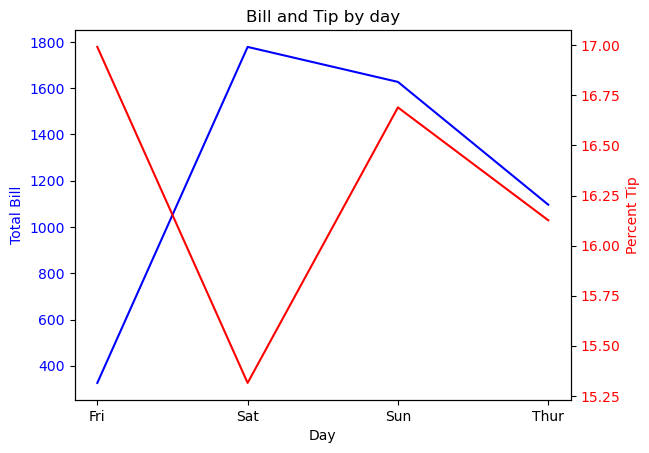

In [44]:
# Create the figure and primary axis
fig, ax1 = plt.subplots()

# Plot the first line on the primary y-axis
ax1.plot(data['day'], data['total_bill'], 'b-', label='Total Bill')
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Bill', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(data['day'], data['percent_tip'], 'r-', label='Percent Tip')
ax2.set_ylabel('Percent Tip', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and show the plot
plt.title('Bill and Tip by day')
plt.show()

### Plotting two lines and Customizations of Line Graph

In [45]:
year = [10 , 11 , 12 , 13 , 14]
product_1_sales = [100 , 105 , 102, 90 , 150]
product_2_sales = [89 , 100 , 120 , 130 , 110]

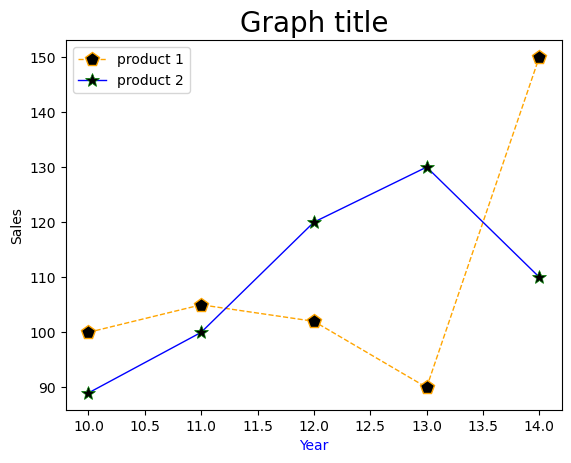

In [46]:
# line 1
plt.plot(year , product_1_sales , 
         color = 'orange' ,
         label = 'product 1' ,
         linestyle = '--' ,
         linewidth = 1 ,
         marker = 'p' ,
         markerfacecolor = 'black',
         markersize = 10)

# line 2
plt.plot(year , product_2_sales , 'b*-',  #  b*-  = is the shortcode for color, marker , linestyle
         label = 'product 2' ,
         markersize = 10 ,
         linewidth = 1,
         markerfacecolor = 'black',
         markeredgecolor = 'green' ,
         markeredgewidth = 0.5)

# marker (*) with b (blue as colour) ,line style (-) ,'b*-' is called fmt parameter
# markerfacecolor = color of marker , markeredgecolor = markers edges color
# label is mentioned here for plt.legend()


plt.xlabel('Year' , color = 'blue' , size = 10)           # x axis label
plt.ylabel('Sales')                                       # y axis label
plt.title('Graph title',size = 20) 

plt.legend()  # if de don't mention this line then labels of lines will not show up.
plt.show()

# possible marker symbols: https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers
# possible linestype options: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
# we can use the linewidth or lw keyword argument. The line style can be selected using the linestyle or ls keyword arguments

### Scatter plot

Uses

- seeing the relationship between the variables
- visualizing the cluster in the data i.e distribution of data
- for outlier detection

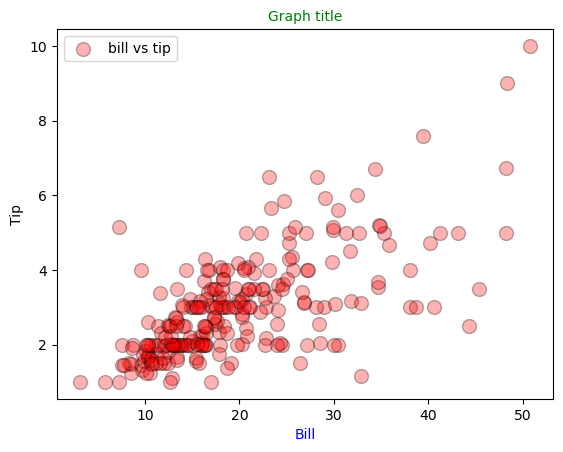

In [47]:
plt.scatter(df['total_bill'] , df['tip'],  label = 'bill vs tip', marker = 'o' ,
            edgecolors = 'black' , color = 'red', s = 100 , alpha = 0.3 ) 
# alpha -> 0-1, controls the intensity of colour

plt.xlabel('Bill' , color = 'blue' , size = 10)           # x axis label
plt.ylabel('Tip')
plt.title('Graph title',color = 'green',size = 10) 
plt.legend()  
plt.show()

## correlation

In [48]:
df[['total_bill' , 'percent_tip', 'tip', 'size']].corr() # pandas dataframe method

,total_bill,percent_tip,tip,size
total_bill,1.000000,-0.338629,0.675734,0.598315
percent_tip,-0.338629,1.000000,0.342361,-0.142844
tip,0.675734,0.342361,1.000000,0.489299
size,0.598315,-0.142844,0.489299,1.000000


### Bubble Plot
- allows to add more dimension of data to scatter plot
- you can compare various data points 

In [49]:
df.head()

,total_bill,tip,gender,smoker,day,time,size,percent_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.049999
2,21.01,3.5,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


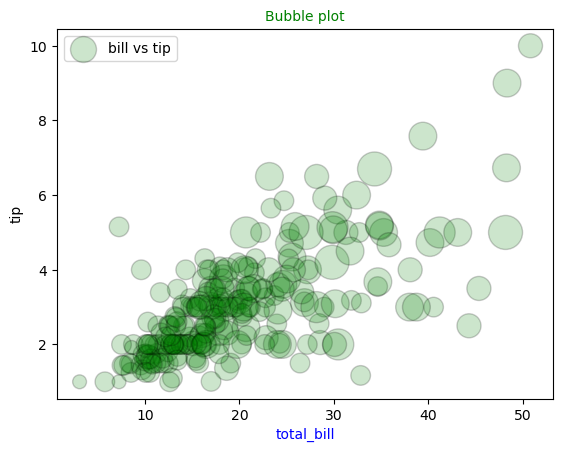

In [50]:
plt.scatter(df['total_bill'] ,df['tip'],
            label = 'bill vs tip',
            marker = 'o' ,  edgecolors = 'black' , color = 'green', 
            s = df['size'] * 100 ,
            alpha = 0.2 ) 

plt.xlabel('total_bill' , color = 'blue' , size = 10)           # x axis label
plt.ylabel('tip')
plt.title('Bubble plot',color = 'green',size = 10) 
plt.legend()  
plt.show()

In [51]:
df.corr(numeric_only=True) # pandas dataframe method

,total_bill,tip,size,percent_tip
total_bill,1.000000,0.675734,0.598315,-0.338629
tip,0.675734,1.000000,0.489299,0.342361
size,0.598315,0.489299,1.000000,-0.142844
percent_tip,-0.338629,0.342361,-0.142844,1.000000


### Pie Chart
- Parts to whole relationship
- comparing categories
- Highlighting dominant categories  

In [52]:
df.head(2)

,total_bill,tip,gender,smoker,day,time,size,percent_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.049999


In [53]:
data = df.groupby('day', as_index = False, observed=False).agg({'tip' : 'sum'})

In [54]:
data

,day,tip
0,Fri,51.959999
1,Sat,260.399994
2,Sun,247.389999
3,Thur,171.830002


In [55]:
data['tip'].sum()

np.float32(731.58)

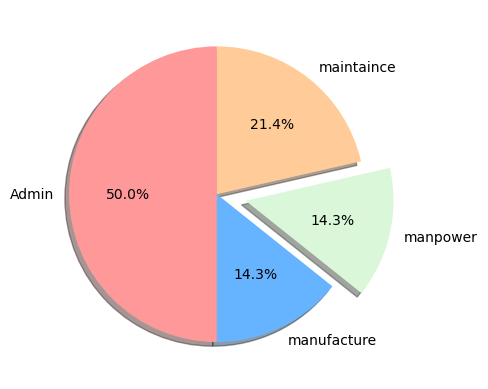

In [56]:
activity =  ['Admin','manufacture','manpower','maintaince']
budget =    [  7 ,      2  ,           2   ,        3  ]

# activity =  data['day']
# budget =    data['tip']

colours_we_want = ['#ff9999','#66b3ff','#DBF7DA','#ffcc99']    # these are  RGB hex colour codes for colours
                                                               # we cannot use alpha so use lighr colours by hex code
# google  - google hex colours

plt.pie(budget ,
        labels = activity ,
        colors = colours_we_want ,      
        explode = ( 0 , 0 , 0.2 , 0 ), # explode slices out a particular slice , brings it out , here 3rd slice is tsken out.     
        autopct = '%1.1f%%',           # autopct shows percent weight of slice ,  we have to learn the string code
        startangle = 90 ,              # startangle makes the starting aligned at 90 degree and then moves counter clockwise
        shadow = True ,                # shadow displays the shadow of slices
        radius = 1 ,                   # for radius of the circle
        counterclock = True ,          # labeling done counter clockwise
        textprops = {'fontsize': 10} )  

plt.show()

##### Bar Graph
- compare categories , eg - compare population of multiple cites , sales of product
- Showing frequency distribution / Ranking
- Parts to whole ratio
- Representing data w.rt. Time - Time series data

In [57]:
df.head(2)

,total_bill,tip,gender,smoker,day,time,size,percent_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.049999


In [58]:
data = df.groupby('day', as_index = False, observed=False).agg({'size' : 'sum' , 'tip' : 'sum'})
data

,day,size,tip
0,Fri,40,51.959999
1,Sat,219,260.399994
2,Sun,216,247.389999
3,Thur,152,171.830002


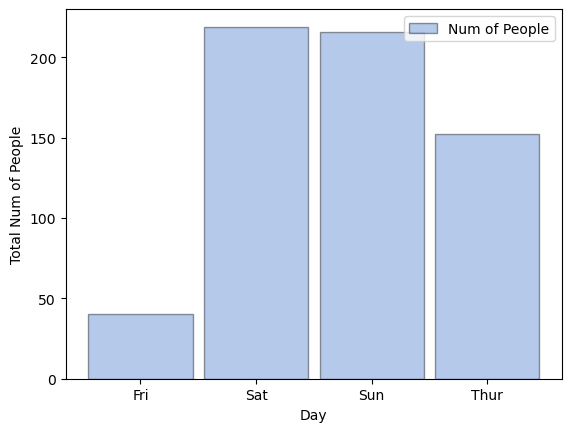

In [59]:
plt.bar(data['day'], data['size'],  label = 'Num of People', width = 0.9 , alpha = 0.4 , edgecolor = 'black')
plt.xlabel('Day')
plt.ylabel('Total Num of People')
plt.legend()
plt.show()

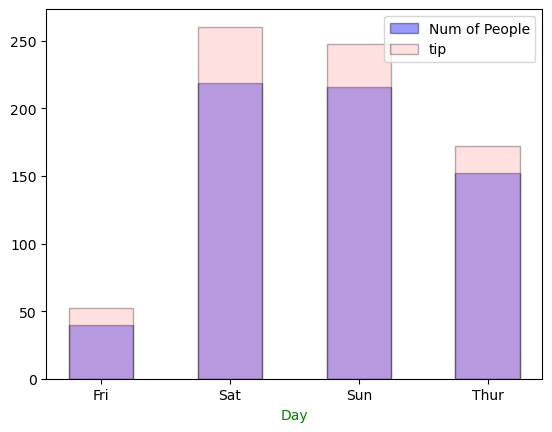

In [60]:
plt.bar(data['day'], data['size'], label = 'Num of People', width = 0.5 , color = 'blue', alpha  = 0.4 , edgecolor = 'black')

plt.bar(data['day'], data['tip'],  label = 'tip' ,  width = 0.5 , color = '#ff9999' , alpha = 0.3 , edgecolor = 'black' )

plt.xlabel('Day' , color = 'green')
plt.legend()
plt.show()

### Histogram
- Understanding Data Distribution  / Analyzing the Frequency distribution
- Helps us to look at the skewness of data - Central tendency and Variablity Measures
- Comparing different datasets

How to dividie continous data into buckets or bins

In [61]:
total_bill = df[['total_bill', 'size']].copy()
df['average_per_person'] = df['total_bill'] / df['size']

df

,total_bill,tip,gender,smoker,day,time,size,percent_tip,average_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94,8.495
1,10.34,1.66,Male,No,Sun,Dinner,3,16.049999,3.446667
2,21.01,3.5,Male,No,Sun,Dinner,3,16.66,7.003334
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98,11.84
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68,6.1475
...,...,...,...,...,...,...,...,...,...
239,29.030001,5.92,Male,No,Sat,Dinner,3,20.389999,9.676667
240,27.18,2.0,Female,Yes,Sat,Dinner,2,7.36,13.59
241,22.67,2.0,Male,Yes,Sat,Dinner,2,8.82,11.335
242,17.82,1.75,Male,No,Sat,Dinner,2,9.82,8.91


In [62]:
print(df['average_per_person'].min())
print(df['average_per_person'].max())

2.875
20.275


In [63]:
bins = range(0 , 22  , 2)  
# [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55] , [0 , 5)
# 0-5 , 5-10 , 10-15 ................

list(bins)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [64]:
total_bill['bin / bucket'] = pd.cut( df['average_per_person'] , bins , include_lowest = True , right = False  ) #  [0 , 5) [5 , 10)
# right = true = (0  , 5] , (5 , 10]  

In [65]:
total_bill

,total_bill,size,bin / bucket
0,16.99,2,"[8, 10)"
1,10.34,3,"[2, 4)"
2,21.01,3,"[6, 8)"
3,23.68,2,"[10, 12)"
4,24.59,4,"[6, 8)"
...,...,...,...
239,29.030001,3,"[8, 10)"
240,27.18,2,"[12, 14)"
241,22.67,2,"[10, 12)"
242,17.82,2,"[8, 10)"


In [66]:
total_bill['bin / bucket'].value_counts()  # occurences per bin

bin / bucket
[6, 8)      79
[4, 6)      58
[8, 10)     50
[10, 12)    27
[12, 14)    11
[2, 4)       8
[16, 18)     5
[14, 16)     5
[0, 2)       0
[18, 20)     0
Name: count, dtype: int64

In [67]:
df['total_bill']

0          16.99
1          10.34
2          21.01
3          23.68
4          24.59
         ...    
239    29.030001
240        27.18
241        22.67
242        17.82
243    18.780001
Name: total_bill, Length: 244, dtype: Float32

In [68]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55] # bins / buckets

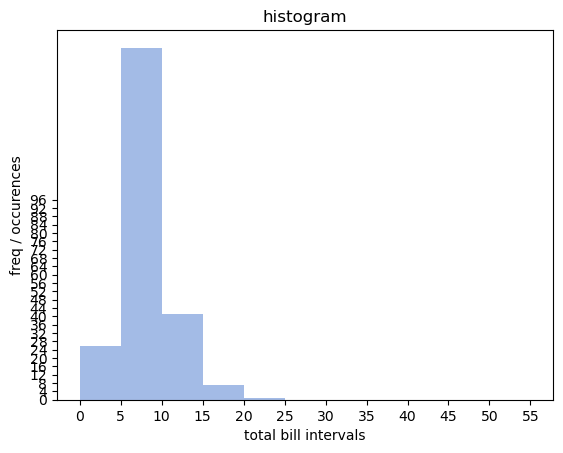

In [69]:
plt.hist(df['average_per_person'] , bins, histtype = 'bar', rwidth = 1 , alpha = 0.5 )

plt.xlabel('total bill intervals')
plt.xticks(bins)

plt.ylabel('freq / occurences')
plt.yticks(range(0,100 ,4))

plt.title('histogram')
plt.show()

#histtype : 'bar', 'barstacked', 'step', '

### **For grid in graph**

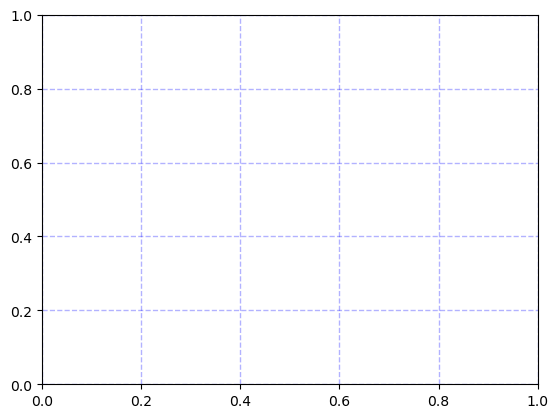

In [70]:
plt.grid(True , color = 'blue', linestyle = '--', linewidth = 1 , alpha = 0.3)  # alpha gives transparency

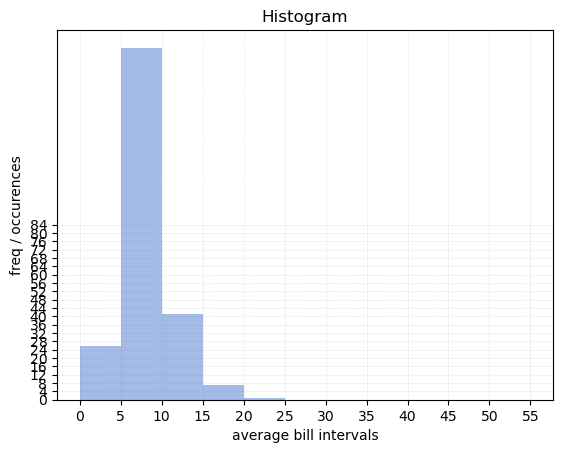

In [71]:
from matplotlib import style

style.use('seaborn-v0_8-muted')

plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5 , alpha = 0.2)

plt.hist(df['average_per_person'] , bins, histtype = 'bar', rwidth = 1 , alpha = 0.5 )

plt.xlabel('average bill intervals')
plt.xticks(bins)

plt.ylabel('freq / occurences')
plt.yticks(range(0, 88 ,4))

plt.title('Histogram')
plt.show()

## Box plots
- usefull for detecting outliers
- gives you an idea about the skewness / distribution of data

In [72]:
df

,total_bill,tip,gender,smoker,day,time,size,percent_tip,average_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94,8.495
1,10.34,1.66,Male,No,Sun,Dinner,3,16.049999,3.446667
2,21.01,3.5,Male,No,Sun,Dinner,3,16.66,7.003334
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98,11.84
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68,6.1475
...,...,...,...,...,...,...,...,...,...
239,29.030001,5.92,Male,No,Sat,Dinner,3,20.389999,9.676667
240,27.18,2.0,Female,Yes,Sat,Dinner,2,7.36,13.59
241,22.67,2.0,Male,Yes,Sat,Dinner,2,8.82,11.335
242,17.82,1.75,Male,No,Sat,Dinner,2,9.82,8.91


In [73]:
df.dtypes

total_bill             Float32
tip                    Float32
gender                category
smoker                category
day                   category
time                  category
size                     Int16
percent_tip            Float32
average_per_person     Float32
dtype: object

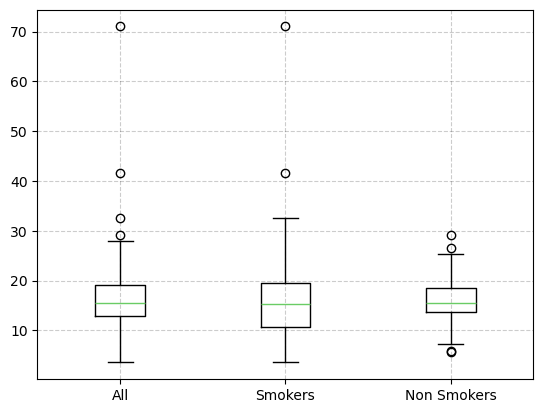

In [74]:
tip_data = [ df["percent_tip"], df[df["smoker"] == "Yes"]["percent_tip"], df[df["smoker"] == "No"]["percent_tip"] ]

plt.boxplot(tip_data, tick_labels=["All", "Smokers", "Non Smokers"])

plt.grid(color="k", linestyle="--", alpha=0.2)

plt.show()

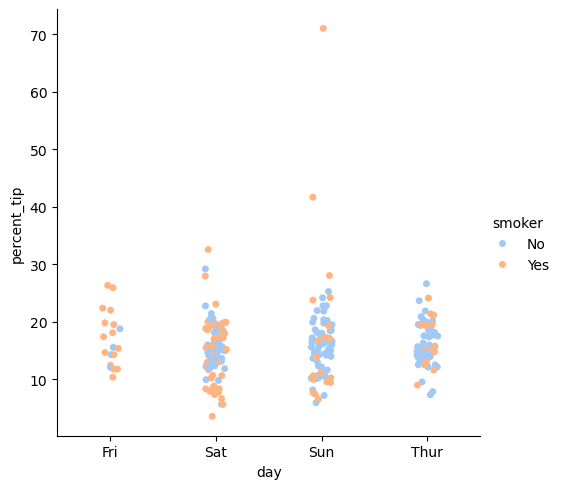

In [76]:
import seaborn as sns

sns.catplot(x = "day", y = "percent_tip", hue = "smoker", data = df, palette="pastel")

In [77]:
sns.set_theme()

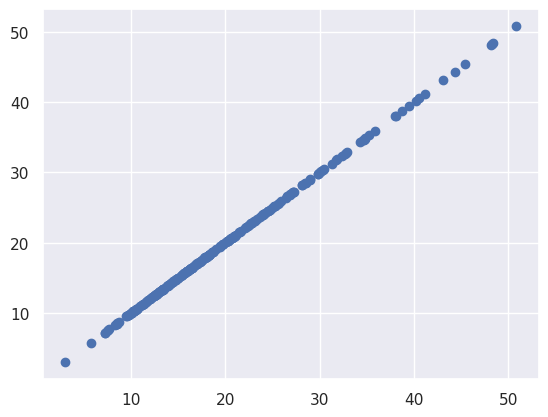

In [78]:
# to identify outliers
plt.scatter(df['total_bill'] , df['total_bill'])

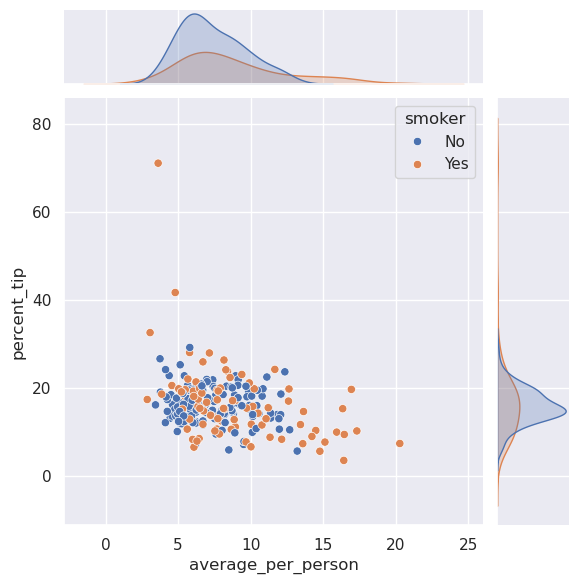

In [79]:
sns.jointplot(data = df, x="average_per_person", y="percent_tip", hue="smoker")

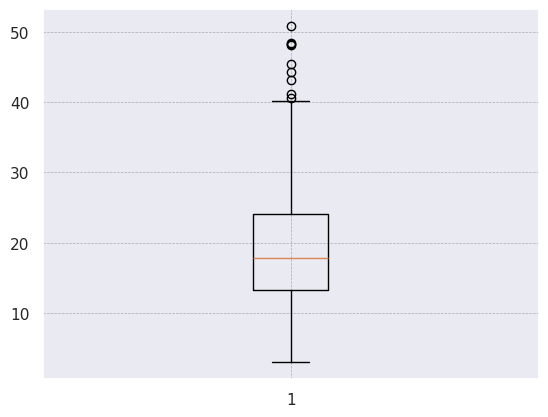

In [80]:
plt.boxplot(df['total_bill'], vert = True)
plt.grid(color ='k', linestyle = '--', linewidth = 0.5 , alpha = 0.3)
plt.show()

## Volin Plots
- usefull for detecting outliers
- shows the distribution of data on centre line

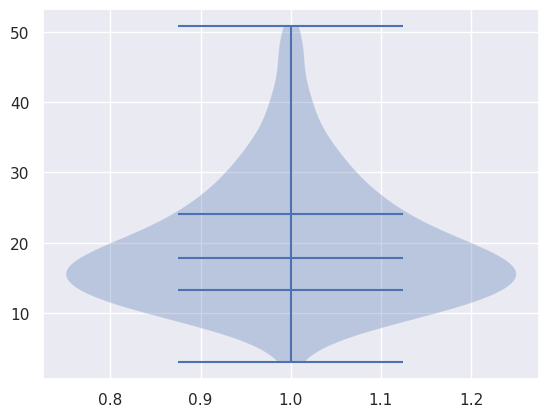

In [81]:
qu = [0.25, 0.5, 0.75]

plt.violinplot(df['total_bill'], quantiles = [qu,])
plt.show()

### **For using styles in graph**

In [82]:
from matplotlib import style
print(style.available)  # prints styles available

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


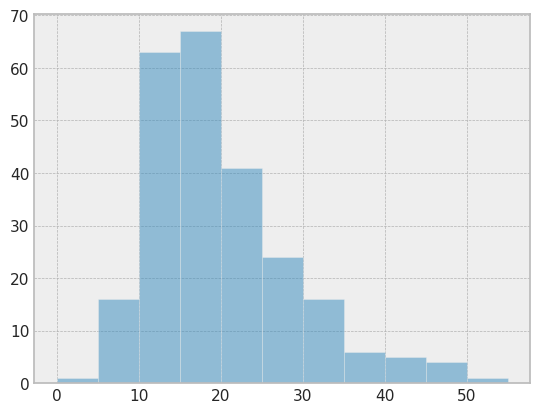

In [83]:
style.use('bmh')

plt.hist(df['total_bill'] , bins, histtype = 'bar', rwidth = 1 , alpha = 0.5 )

plt.show()

## Customizing the Graphs

#### Rotating the x-axis and y-axis labels.

In [84]:
a = np.array([1,3,6,9,11,14])
b = a ** 2

In [85]:
a

array([ 1,  3,  6,  9, 11, 14])

In [86]:
b

array([  1,   9,  36,  81, 121, 196])

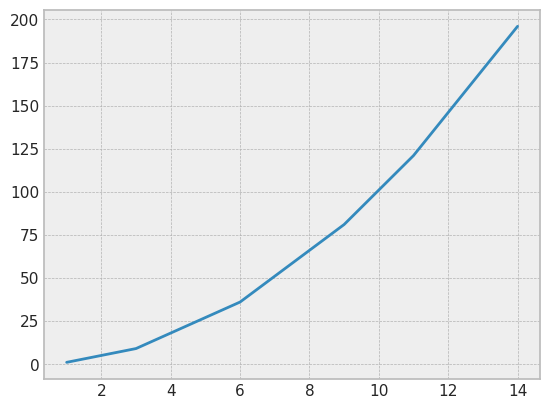

In [87]:
plt.plot(a,b)

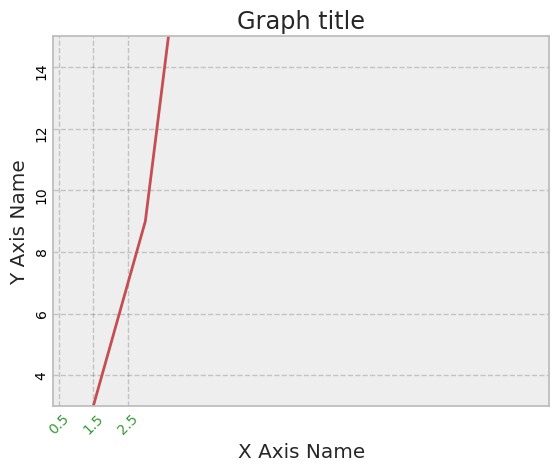

In [88]:
plt.plot(a, b, 'r') 
plt.xlabel('X Axis Name') 
plt.ylabel('Y Axis Name') 
plt.title('Graph title') 

plt.xticks([0.5,1.5,2.5] ,rotation = 45 ,color = 'green' , size = 10 , alpha = 0.8) 
#  The list in starting mentions the numbers we want on x-axis  , only the no. in list will be shown on x-axis
# this rotates the points on x-axis by 45 degree and colur is green.

plt.yticks(rotation = 90 , color = 'black' , size = 10)  
plt.ylim([3,15])  # sets the range for y axis numbers

plt.grid(True , color = 'k', linestyle = '--', linewidth = 1 , alpha = 0.2)  #alpha gives transparency
plt.show()  

## SUBPLOTS

In [89]:
data_1 = df.groupby('day' , as_index = False, observed=False).agg({'total_bill' : 'sum' , 'tip' : 'sum'})

In [90]:
data_1

,day,total_bill,tip
0,Fri,325.880005,51.959999
1,Sat,1778.400024,260.399994
2,Sun,1627.160034,247.389999
3,Thur,1096.329956,171.830002


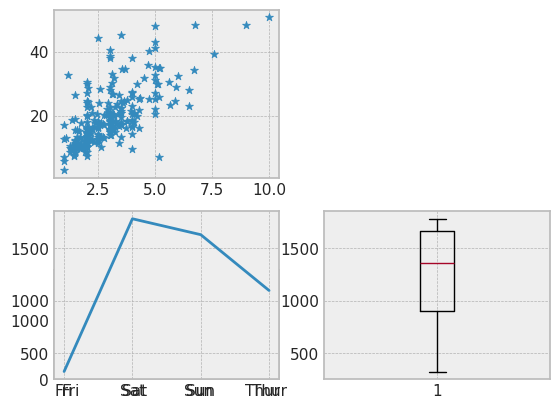

In [91]:
# plt.subplot(number of rows, number of cols, plot_number)
plt.subplot(2,2,1)
plt.scatter(df['tip'], df['total_bill'] , marker = '*')

plt.subplot(3,2,5)
plt.bar(data_1['day'], data_1['total_bill'] , width = 0.2)   

plt.subplot(2,2,3)
plt.plot(data_1['day'], data_1['total_bill'])   

plt.subplot(2,2,4)
plt.boxplot(data_1['total_bill'])   

plt.show()

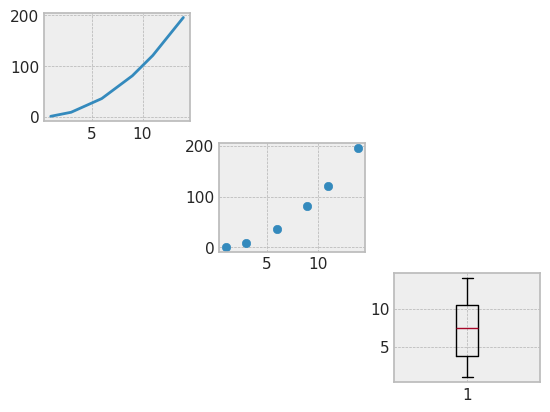

In [92]:
# plt.subplot(number of rows, number of cols, plot_number)
# numbering of subplots starts from top left to right and than next row 

plt.subplot(3,3,1)    #total subplots = 3*3 = 9
plt.plot(a, b)

plt.subplot(3,3,5)
plt.scatter(a,b)  

plt.subplot(3,3,9)
plt.boxplot(a) 

plt.show()

### 3D Graphs

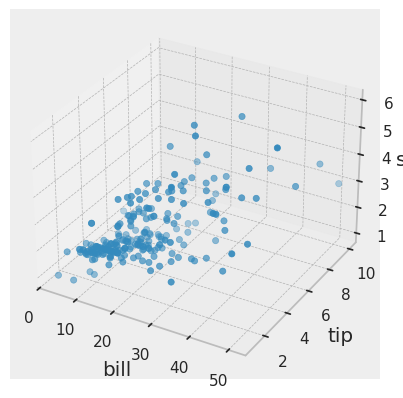

In [93]:
ax = plt.axes(projection = '3d')

ax.scatter(df['total_bill'], df['tip'], df['size'])
ax.set_xlabel('bill')
ax.set_ylabel('tip')
ax.set_zlabel('size')

plt.show()

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the `figsize` and `dpi` keyword arguments. 
* `figsize` is a tuple of the width and height of the figure in inches
* `dpi` is the dots-per-inch (pixel per inch). 

For example:

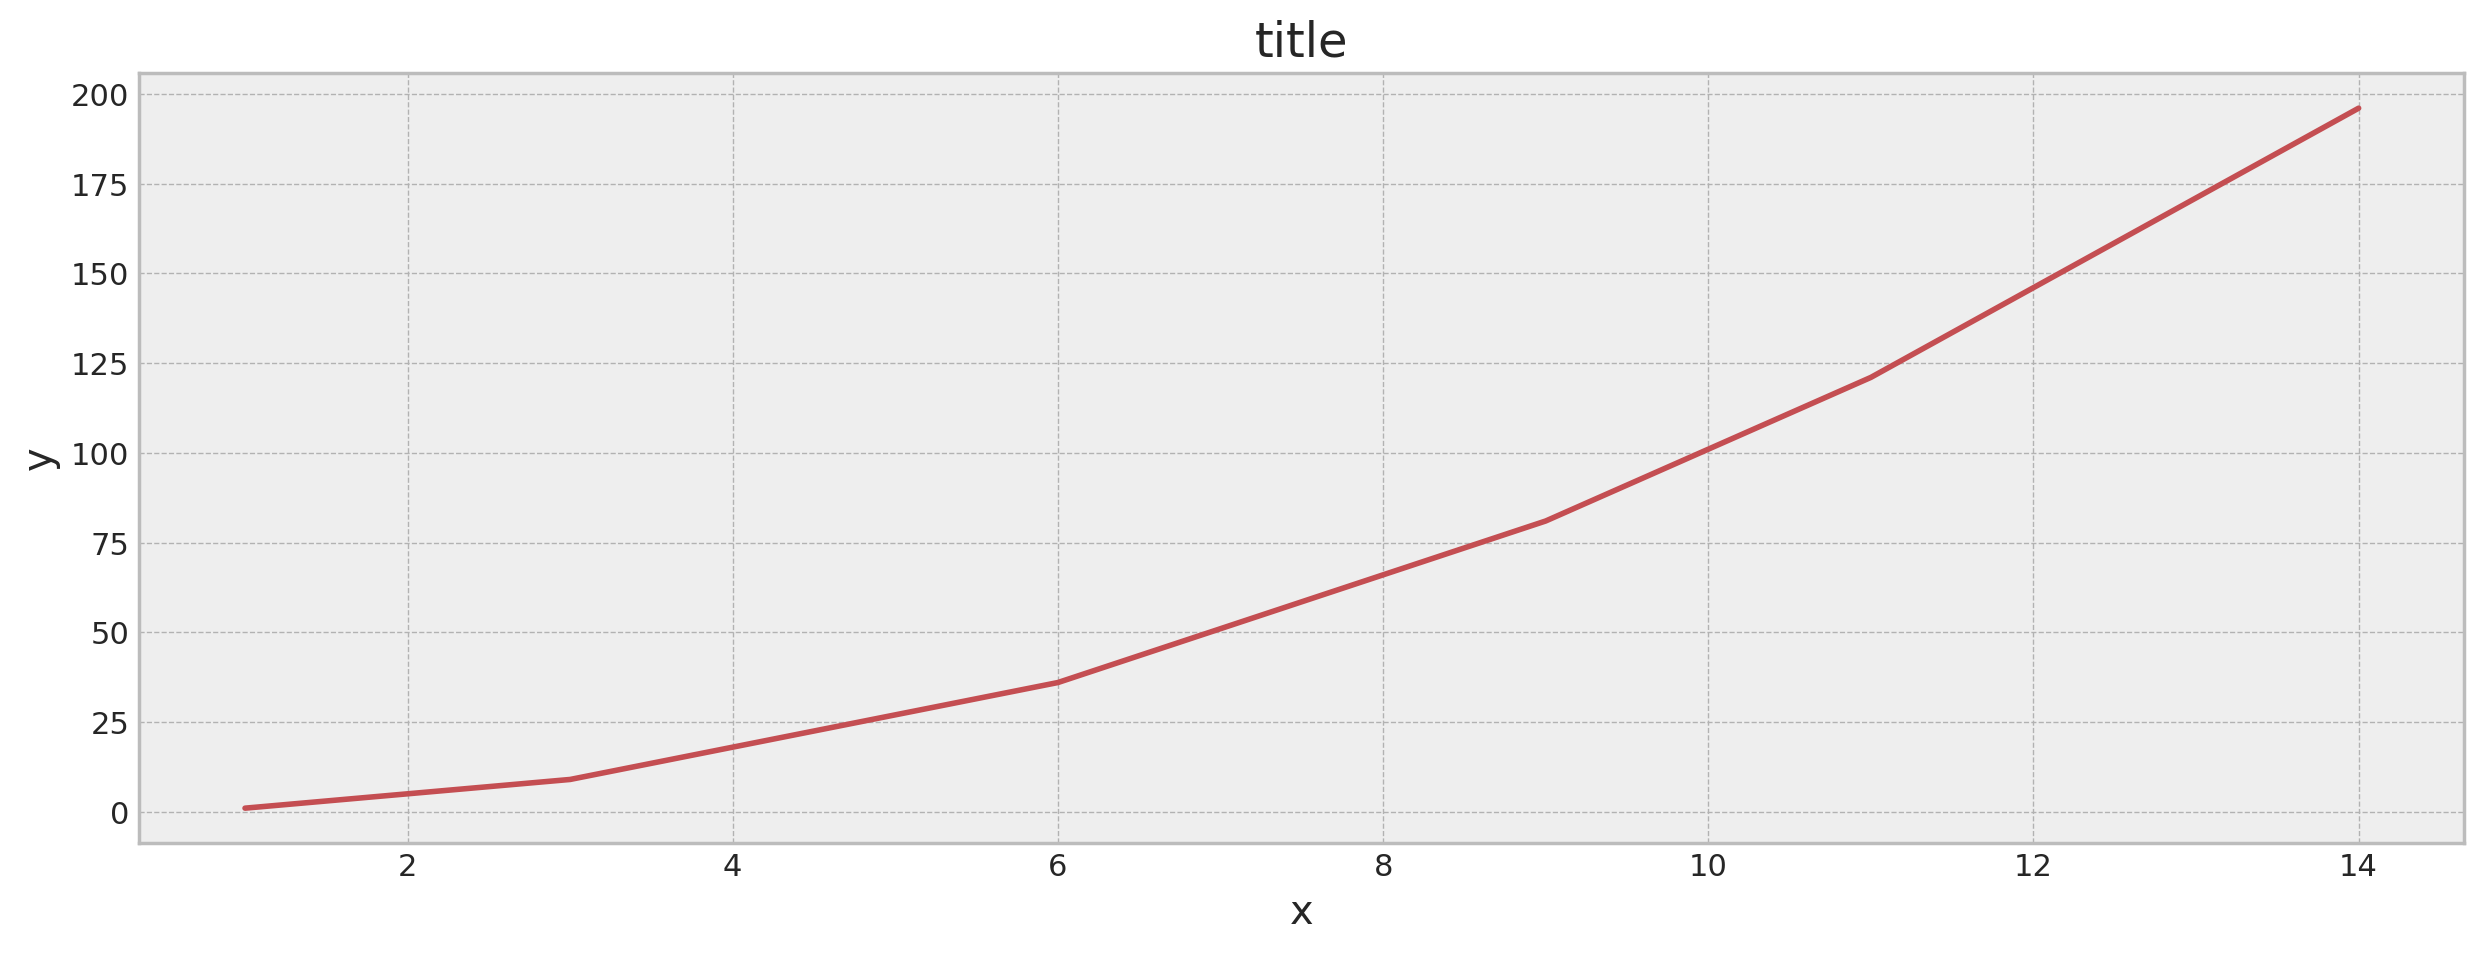

In [94]:
fig = plt.figure(figsize = (15,5), dpi = 200)

plt.plot(a, b, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('title')
plt.show()

## Saving figures
Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. 

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [95]:
fig.savefig("output/filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [96]:
fig.savefig("output/filename.pdf", dpi = 200)